In [1]:
import tensorflow as tf

import cv2
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#angry, disgust, fear, happy, sad, surprise, neutral

num_classes = 7 

batch_size = 256
epochs = 10

In [3]:
with open(r"fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [4]:
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

In [5]:
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("",end="")

In [6]:
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [7]:
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [8]:
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

In [9]:
model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

In [10]:
fit = True

if fit == True:
    #model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
    model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
    model.load_weights('/data/facial_expression_model_weights.h5') #load weights

Epoch 1/10
256/256 [==============================] - 234s 915ms/step - loss: 1.7962 - accuracy: 0.2551
Epoch 2/10
256/256 [==============================] - 244s 954ms/step - loss: 1.5984 - accuracy: 0.3621
Epoch 3/10
256/256 [==============================] - 256s 999ms/step - loss: 1.4214 - accuracy: 0.4516
Epoch 4/10
256/256 [==============================] - 257s 1s/step - loss: 1.3109 - accuracy: 0.4972
Epoch 5/10
256/256 [==============================] - 261s 1s/step - loss: 1.2215 - accuracy: 0.5328
Epoch 6/10
256/256 [==============================] - 258s 1s/step - loss: 1.1567 - accuracy: 0.5592
Epoch 7/10
256/256 [==============================] - 259s 1s/step - loss: 1.0966 - accuracy: 0.5841
Epoch 8/10
256/256 [==============================] - 256s 1s/step - loss: 1.0316 - accuracy: 0.6097
Epoch 9/10
256/256 [==============================] - 262s 1s/step - loss: 0.9815 - accuracy: 0.6294
Epoch 10/10
256/256 [==============================] - 260s 1s/step - loss: 0.9127

In [11]:
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.8279288396171286
Train accuracy: 68.87735724449158
Test loss: 1.24923979694646
Test accuracy: 56.00445866584778


In [12]:
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [14]:
monitor_testset_results = False

if monitor_testset_results == True:
    #make predictions for test set
    predictions = model.predict(x_test)

    index = 0
    for i in predictions:
        if index < 30 and index >= 20:
            #print(i) #predicted scores
            #print(y_test[index]) #actual scores
            
            testing_img = np.array(x_test[index], 'float32')
            testing_img = testing_img.reshape([48, 48]);
            
            plt.gray()
            plt.imshow(testing_img)
            plt.show()
            
            print(i)
            
            emotion_analysis(i)
            print("----------------------------------------------")
        index = index + 1

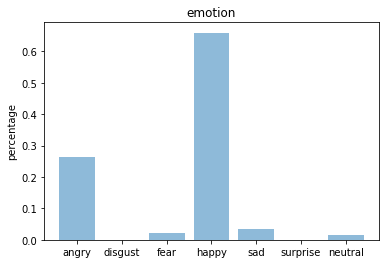

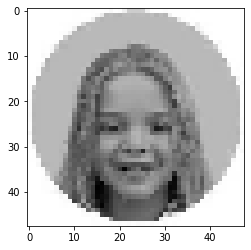

In [28]:
#make prediction for custom image out of test set

img = image.load_img(r"D:/happy girl.jfif", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

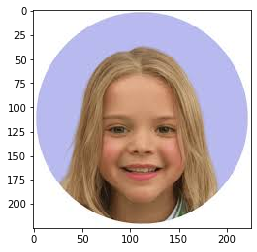

In [29]:
img=cv2.imread("D:/happy girl.jfif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

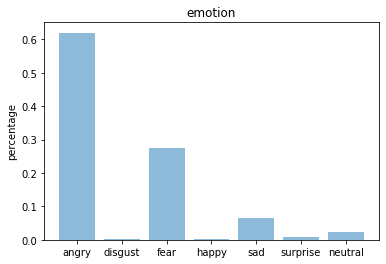

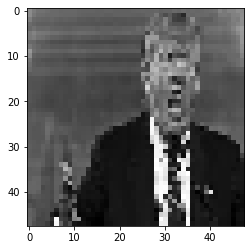

In [30]:
#make prediction for custom image out of test set

img = image.load_img(r"D:/angry trump.jfif", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

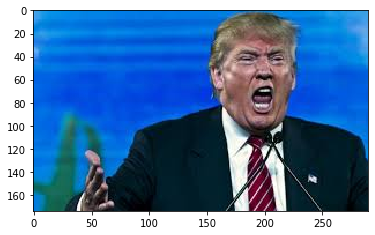

In [31]:
img=cv2.imread("D:/angry trump.jfif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)